# Ozone

In [1]:
#   모집단    전수조사
#   샘플      표본조사

# ex)
#   안전    부도    총          안전    부도    총
#   0       1
#   990     10      1000    =>  10      10     20   =>  재현율이 높아짐
#                              (언더 샘플링)

#   정답    오답    재현율
#   980     10      98%
#   10      5       50%     15/1000 -> 정확도가 높다고 좋은 모델이지는 않음

#   precision       정확도(모형)
#   recall          재현율(실제현상을 얼마나 잘 발견했는가)

#   ========================================================================

#   상관계수
#   음의 상관관계   -1.0    #   x, y = -0.95    서로 매우 다름
#   양의 상관관계    1.0    #   x, y =  0.95    서로 매우 비슷함

#   ========================================================================

#   학습용      검증용
#   80          20
#   70          30

#   100         0   =>  과적합(over fitting)(과대적합 : 학습한 문제는 다 맞추지만 새로운 문제는 잘 맞추지 못함)
#                       과소적합(under fitting)(학습이 부족함)

#               1           2
#   학습용      100%        90%     
#   검증용      70%         85%         2가 더 우수하다고 할  수 있음

#   ========================================================================

#   신경망
#   input       hidden      output
#   입력        계산        출력

In [1]:
import pandas as pd

# csv 파일을 로딩
df = pd.read_csv("c:/workspace3/data/ozone2.csv")

df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

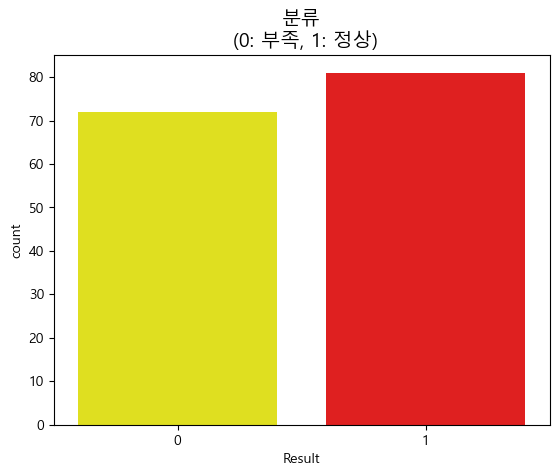

In [2]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(\
fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import seaborn as sns
colors = ["yellow", "red"]
sns.countplot(x='Result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

#불균형 데이터셋

In [3]:
train_cols=['Solar.R', 'Wind', 'Temp']

X = df[train_cols]  
y = df['Result']
print(X)
print(y)

     Solar.R  Wind  Temp
0        8.0   9.7    59
1       25.0   9.7    61
2       78.0  18.4    57
3       48.0  14.3    80
4       49.0  10.3    69
..       ...   ...   ...
148    223.0   5.7    79
149    225.0   2.3    94
150    255.0   4.0    89
151    269.0   4.1    84
152    238.0   3.4    81

[153 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
148    1
149    1
150    1
151    1
152    1
Name: Result, Length: 153, dtype: int64


In [4]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Result'])

df_samp=pd.concat([X_samp,y_samp],axis=1)
print(df_samp)
df_samp["Result"].value_counts()

     Solar.R  Wind  Temp  Result
0        8.0   9.7    59       0
1       25.0   9.7    61       0
2       78.0  18.4    57       0
3       48.0  14.3    80       0
4       49.0  10.3    69       0
..       ...   ...   ...     ...
118    275.0   7.4    86       1
111    190.0  10.3    78       1
137    213.0   7.4    88       1
130    183.0   2.8    93       1
84      98.0  11.5    80       1

[144 rows x 4 columns]


Result
0    72
1    72
Name: count, dtype: int64

c:\Python3.9.13\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


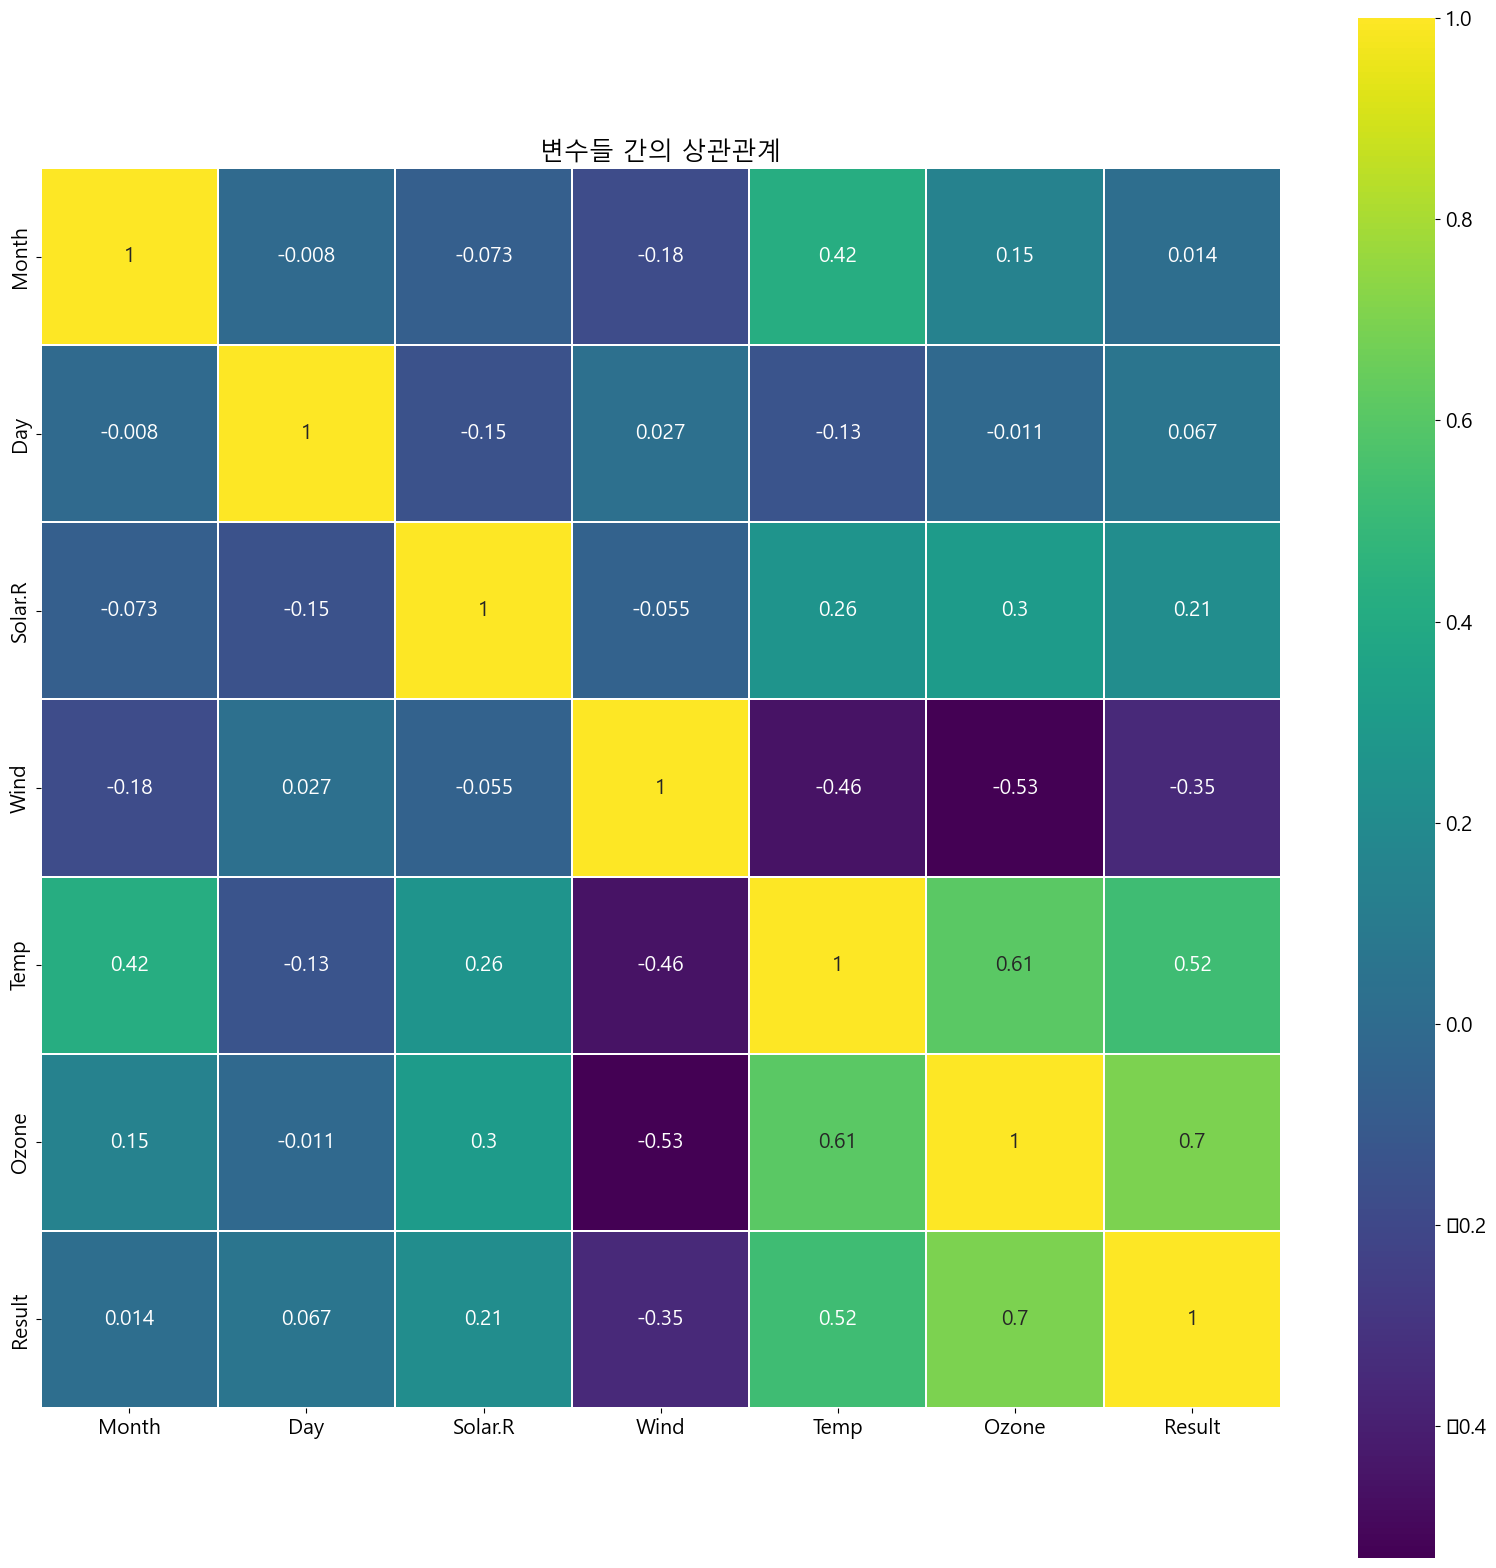

In [5]:
X = X_samp[train_cols]
y = y_samp['Result']
df_samp["Result"].value_counts()

#상관계수 행렬 그래프
plt.figure(figsize=(20, 20))
plt.rc('font', size=15)
sns.heatmap(df.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
#              상관계수
plt.title('변수들 간의 상관관계')

plt.show()

In [6]:
from sklearn.model_selection import train_test_split

#데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=7)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

# 3. 모델 구성
model = Sequential(name='mymodel')

# 노드개수, 독립변수 개수, 활성화함수 relu
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu',name='hidden-1'))
#                                          독립변수             활성화함수      레이어 이름
model.add(Dense(64, activation='relu',name='hidden-2'))
model.add(Dense(64, activation='relu',name='hidden-3'))

# sigmoid : 0.0~1.0
model.add(Dense(1, activation='sigmoid',name='output'))

# 4. 모델 학습과정 설정
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
#             손실함수(평균제곱오차) 최적화함수     성능측정기준(정확도)

In [8]:
model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 128)               512       
                                                                 
 hidden-2 (Dense)            (None, 64)                8256      
                                                                 
 hidden-3 (Dense)            (None, 64)                4160      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 12,993
Trainable params: 12,993
Non-trainable params: 0
_________________________________________________________________


In [9]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러

scaler.fit(X_train)
#      패턴분석
X_train_scaled=scaler.transform(X_train)
#       변환
X_test_scaled=scaler.transform(X_test)

In [10]:
from datetime import datetime  
import tensorflow as tf

logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  
logdir  

'c:/logs/20230720-103708'

In [11]:
# pip install tensorboard

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# 5. 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=500,callbacks=[tensorboard_callback])

Epoch 1/500
4/4 [==============================] - 1s 10ms/step - loss: 0.2414 - accuracy: 0.6000
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2204 - accuracy: 0.7739
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2042 - accuracy: 0.7565
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1882 - accuracy: 0.7565
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1777 - accuracy: 0.7478
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1667 - accuracy: 0.7478
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1604 - accuracy: 0.7565
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1533 - accuracy: 0.7652
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1506 - accuracy: 0.7739
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1480 - accuracy: 0.7913
Epoch 11/500
4/4 [==========

In [12]:
#anaconda prompt에서 실행

#tensorboard --logdir=로그파일경로

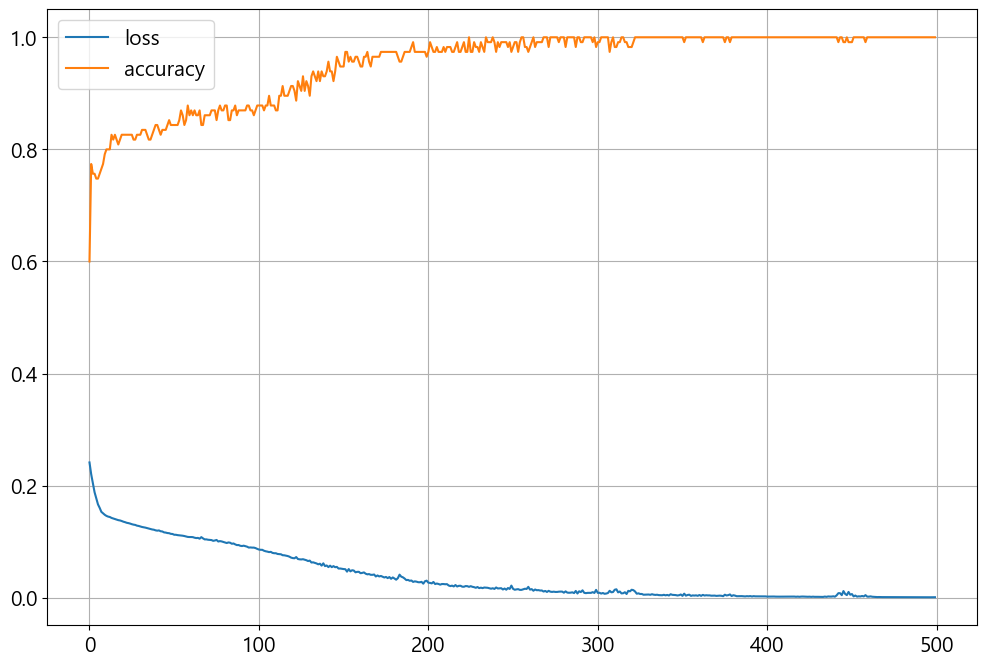

In [13]:
# 6. 모델 학습 과정 표시

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #학습용 데이터셋의 손실률
plt.plot(hist.history['accuracy']) #학습용 데이터셋의 정확도
plt.legend(['loss','accuracy'])
plt.grid()

plt.show()

In [14]:
# 7. 모델 평가

scores = model.evaluate(X_train_scaled, y_train)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

scores = model.evaluate(X_test_scaled, y_test)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

4/4 [==============================] - 0s 3ms/step - loss: 8.3148e-04 - accuracy: 1.0000
[0.0008314772276207805, 1.0]
accuracy: 100.00%
1/1 [==============================] - 0s 26ms/step - loss: 0.2924 - accuracy: 0.6897
[0.29241520166397095, 0.6896551847457886]
accuracy: 68.97%


In [15]:
#   신경망은 설명력이 낮음
#   설명력
#           ->  로지스틱, 회귀분석, 의사결정나무

In [16]:
#새로운 값 예측

#일조량 25, 풍량 10.8, 화씨온도 71도일 때의 오존량
test_set = [[25, 10.8, 71]]
test_set=scaler.transform(test_set)

print(model.predict(test_set)) # 1일 확률 0%

1/1 [==============================] - 0s 95ms/step
[[0.0792582]]


c:\Python3.9.13\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
#일조량 255, 풍량 4.3, 화씨온도 90도일 때의 오존량

test_set = [[25, 4.3, 90]]
test_set=scaler.transform(test_set)
print(model.predict(test_set)) # 1일 확률 98.5%

1/1 [==============================] - 0s 24ms/step
[[1.]]


c:\Python3.9.13\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
model.save('c:/workspace3/model/ozone/ozone.h5')

In [19]:
import joblib

joblib.dump(scaler,'c:/workspace3/model/ozone/scaler.model')

['c:/workspace3/model/ozone/scaler.model']